In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fvc
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,926 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
#폰트 깨짐 대비 설정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
# drive.mount
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# **다음 분기에 어떤 게임을 설계해야 할까?**

In [4]:
# 데이터 입력

df_url = '/content/drive/MyDrive/Colab Notebooks/Codestate_AI/Example_data/vgames2.csv'
df = pd.read_csv(df_url)
df = df.drop(columns = 'Unnamed: 0')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# Q0 : **데이터 전처리**

In [5]:
# 결측치 확인
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
# Year에서 연도와 관련 없는 숫자가 있는가? (+ NaN 0으로 대체)
df['Year'] = df['Year'].fillna(0)
Year_count = df['Year'].value_counts(ascending=True, dropna=False)
df_year = pd.DataFrame(Year_count)
df_year.head()

,Year
94.0,1
86.0,1
2020.0,1
14.0,2
13.0,2


In [7]:
# 관련 없는 숫자가 어디에 있는가? (Index Search)
print(df[df['Year'] < 100])

# 이후 수정 작업은 Excel로 진행

                                             Name Platform  ...  JP_Sales Other_Sales
31                                      Rock Band     X360  ...         0        0.21
74        Age of Empires III: Complete Collection       PC  ...         0        0.03
81                          Treasures of the Deep       PS  ...         0        0.01
109    Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii  ...      0.02           0
213                              NASCAR Unleashed      PS3  ...         0        0.01
...                                           ...      ...  ...       ...         ...
16278                               Madden NFL 11      Wii  ...         0         50K
16394                               Point Blank 3       PS  ...         0           0
16425                              Yoostar on MTV     X360  ...         0           0
16432                                 Bejeweled 3     X360  ...         0        0.01
16482            Super Robot Taisen F Kanketsuhen     

In [8]:
# Genre에서 장르와 관련 없는 내용이 있는가? (+ NaN 0으로 대체)
df['Genre'] = df['Genre'].fillna(0)
Genre_count = df['Genre'].value_counts(ascending=True, dropna=False)
Genre_count.head(20)

# 이후 수정 작업은 Excel로 진행
# Misc에 해당되는 Data는 구글 검색 후 기존 11개 항목에 포함된다면 해당 항목으로 교체 진행. 포함되지 않는다면 Misc 유지

0                 50
Puzzle           578
Strategy         680
Fighting         847
Simulation       865
Platform         884
Racing          1243
Adventure       1280
Shooter         1308
Role-Playing    1483
Misc            1734
Sports          2341
Action          3305
Name: Genre, dtype: int64

In [9]:
# Publisher에서 관련 없는 내용이 있는가? (+ NaN 0으로 대체)
df['Publisher'] = df['Publisher'].fillna(0)
Publisher_count = df['Publisher'].value_counts(ascending=True, dropna=False)
Publisher_count.head()

# 이후 수정 작업은 Excel로 진행
# 기업이 합병된 경우 합병되기 전 기업은 하나의 기업명으로 교체
# ex : Activision, Activision Blizzard, Activision Value -> Activision Blizzard로 통합

Giza10                         1
Square EA                      1
Inti Creates                   1
Extreme Entertainment Group    1
Origin Systems                 1
Name: Publisher, dtype: int64

In [10]:
# Platform에서 관련 없는 내용이 있는가?
Platform_count = df['Platform'].value_counts(ascending=True, dropna=False)
Platform_count.head()

# 결측치가 없으며, 기기 종류에도 특이점은 없는 것으로 판단되어 Raw Data 그대로 진행 (분석 간 특이사항 발생시 내용 수정 예정)

GG      1
PCFX    1
TG16    2
3DO     3
SCD     6
Name: Platform, dtype: int64

In [11]:
# 윗 단계까지 완료된 df2 파일을 새로 불러오기
df_url2 = '/content/drive/MyDrive/Colab Notebooks/Codestate_AI/Example_data/vgames2_v1.csv'
df2 = pd.read_csv(df_url2)
df2 = df2.drop(columns = 'Unnamed: 0')
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action Force,2600,1982,Action,CPG Products,0.5,0.03,0,0.01
1,Adventure,2600,1980,Adventure,Atari,1.21,0.08,0,0.01
2,Adventures of Tron,2600,1981,Action,Mattel Interactive,0.63,0.03,0,0.01
3,Air Raid,2600,1981,Action,Men-A-Vision,0.72,0.04,0,0.01
4,Air-Sea Battle,2600,1977,Shooter,Atari,0.91,0.06,0,0.01


In [12]:
# Sales Data에 불필요한 내용이 있는가?
# (M, K 포함 확인 및 아래의 코드로 국가별 Sales Data에 M과 K가 각각 99~100개가 있음을 확인)
NA_count = df2['NA_Sales']
print(df2[df2['NA_Sales'].str.contains('M')])

                                                    Name  ... Other_Sales
547                           Sousaku Alice to Oujisama!  ...           0
569                  Super Street Fighter IV: 3D Edition  ...        0.09
886                                          Bratz Ponyz  ...        0.02
1526               Irozuki Tingle no Koi no Balloon Trip  ...           0
1610   Kanshuu Nippon Joushikiryoku Kentei Kyoukai: I...  ...           0
...                                                  ...  ...         ...
16025                                       NFL Street 2  ...        0.02
16053               Outlaw Golf: Nine Holes of Christmas  ...           0
16056                                           OutRun 2  ...        0.01
16215                           SWAT: Global Strike Team  ...        0.01
16387                                   Alien: Isolation  ...        0.04

[100 rows x 9 columns]


In [13]:
# K가 포함되어 있는 Data는 0.001 곱하기, M이 포함되어 있는 Data는 M 제거
df2.NA_Sales = (df2.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * 
          df2.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1).replace(['K','M'], [0.001, 1]).astype(float))
df2.EU_Sales = (df2.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * 
          df2.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1).replace(['K','M'], [0.001, 1]).astype(float))
df2.JP_Sales = (df2.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * 
          df2.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1).replace(['K','M'], [0.001, 1]).astype(float))
df2.Other_Sales = (df2.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * 
          df2.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1).replace(['K','M'], [0.001, 1]).astype(float))

## **Summary**

1. Year : 오기입된 내용 및 결측치 수정 (구글 검색 활용) 
2. Genre : 결측치 수정 및 Misc 장르 수정 (구글 검색 활용)
3. Publisher : 합병 기업 업데이트 진행 (구글 검색 활용)
4. Sales : M, K 수량 단위 수정

# **Q1 : 지역별 선호하는 게임 장르**

In [42]:
# 게임 장르 및 지역 판매량 데이터 추출 
gen_sum = pd.DataFrame(df2[{'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}].groupby(df2['Genre']).sum())
gen_sum = gen_sum.reset_index()
gen_sum

,Genre,JP_Sales,Other_Sales,EU_Sales,NA_Sales
0,Action,175.21,212.55,580.26,1006.46
1,Adventure,54.76,20.15,74.78,140.43
2,Fighting,87.35,36.69,101.38,223.72
3,Misc,63.61,32.29,99.11,162.62
4,Platform,132.18,53.14,206.54,462.16
5,Puzzle,65.97,17.26,70.10,140.95
6,Racing,56.69,77.70,239.84,363.46
7,Role-Playing,353.18,59.77,188.61,328.16
8,Shooter,38.31,103.32,315.16,587.70
9,Simulation,67.36,33.32,118.88,196.57


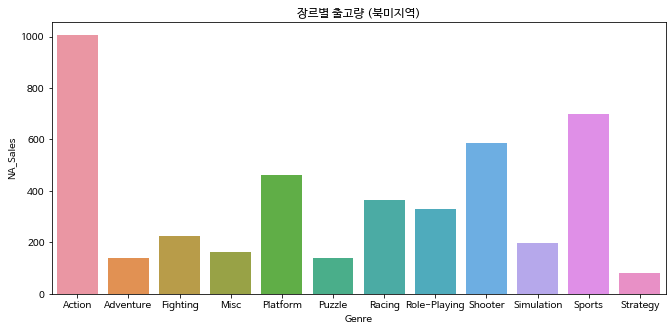

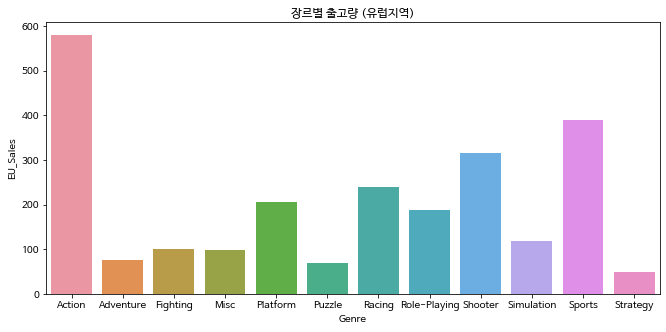

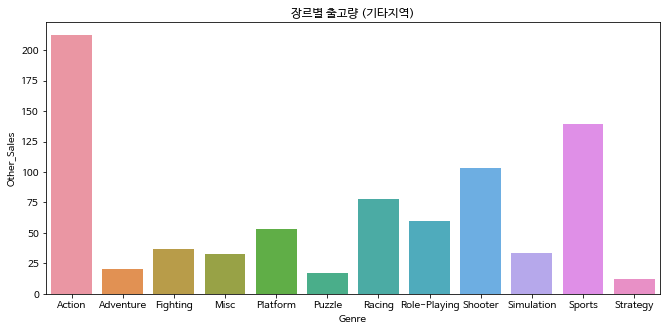

In [15]:
# 시각화
plt.figure(figsize=(11, 5))
sns.barplot(data = gen_sum, x= "Genre", y= "NA_Sales")
plt.title('장르별 출고량 (북미지역)', fontsize='12')

plt.figure(figsize=(11, 5))
sns.barplot(data = gen_sum, x= "Genre", y= "EU_Sales")
plt.title('장르별 출고량 (유럽지역)', fontsize='12')

plt.figure(figsize=(11, 5))
sns.barplot(data = gen_sum, x= "Genre", y= "Other_Sales")
plt.title('장르별 출고량 (기타지역)', fontsize='12')
plt.show()

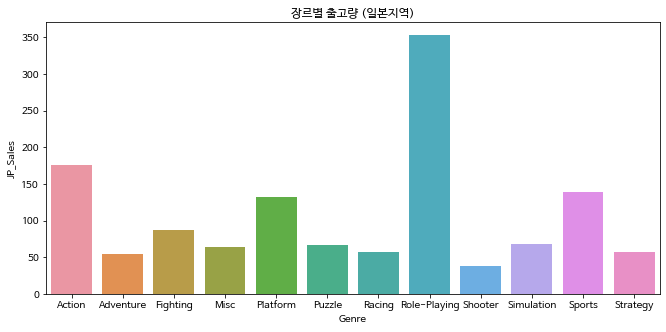

In [16]:
plt.figure(figsize=(11, 5))
sns.barplot(data = gen_sum, x= "Genre", y= "JP_Sales")
plt.title('장르별 출고량 (일본지역)', fontsize='12');
plt.show()

## **Insight**

1. 북미, 유럽, 기타지역에서 Action Genre에 대한 선호도가 높음
2. 일본지역을 제외한 나머지 지역의 장르별 선호도가 비슷한 패턴으로 형성
3. 일본지역은 Role-Playing Genre에 대한 선호도가 높음
4. 이에따라 전 세계를 대상으로 게임을 출시할 때 지역별 접근보다 장르별 접근이 적절하다고 판단

# **Q2 : 연도별 게임 트렌드**

게임의 트렌드를 어떤 수치로 정의하여 분석할 것인가?

1. 연도별 출고량 분포
2. 연도별 플랫폼 분포
3. 연도별 장르 분포

###**1. 연도별 출고량 분포**

In [17]:
# 필요 데이터 추출
df2['Total_Sales'] = df2[{'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}].sum(axis=1)
trend_sum = pd.DataFrame(df2[{'Year', 'Platform', 'Genre', 'Publisher', 'Total_Sales'}])
trend_sum

,Platform,Year,Publisher,Genre,Total_Sales
0,2600,1982,CPG Products,Action,0.54
1,2600,1980,Atari,Adventure,1.30
2,2600,1981,Mattel Interactive,Action,0.67
3,2600,1981,Men-A-Vision,Action,0.77
4,2600,1977,Atari,Shooter,0.98
...,...,...,...,...,...
16593,XOne,2015,Take-Two Interactive,Sports,0.58
16594,XOne,2016,Take-Two Interactive,Strategy,0.02
16595,XOne,2015,Rebellion Developments,Shooter,0.10
16596,XOne,2013,Microsoft Game Studios,Simulation,0.34


In [18]:
# 필요 데이터 가공 -> 트렌드를 분석하기에 표본이 적은 1950~1979년과, 2017~2020년도 데이터는 Drop -> 분석대상 연도 : 1980~2016년도
idx = trend_sum[trend_sum['Year'] < 1980].index
idx2 = trend_sum[trend_sum['Year'] > 2016].index
trend_sum = trend_sum.drop(idx)
trend_sum = trend_sum.drop(idx2)

In [19]:
# 연도별 전체 Sales 합 확인
trend_sale = pd.DataFrame(trend_sum['Total_Sales'].groupby(trend_sum['Year']).sum())
trend_sale = trend_sale.reset_index()

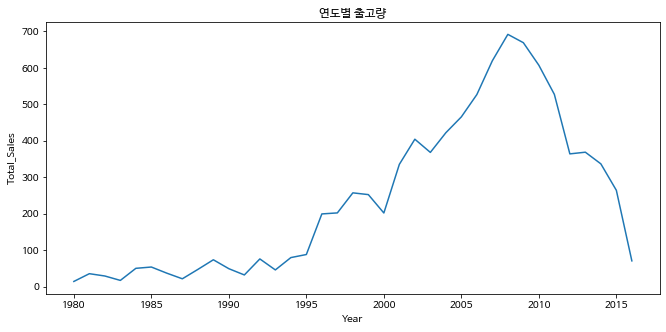

In [20]:
# 시각화
plt.figure(figsize=(11, 5))
sns.lineplot(x="Year", y="Total_Sales", data=trend_sale);
plt.title('연도별 출고량', fontsize='12');
plt.show()

### **Insight**

우리는 전 세계에 먹히는 게임, 즉 높은 판매량을 기록하는 게임을 설계하는 것이 목표이기 때문에

모든 연도별 트렌드를 불필요하게 분석하지 않고 출고량의 증가세가 유의미 한

**1차 성장 : 1995 ~ 2000년**

**2차 성장 : 2000 ~ 2003년**

**3차 성장 : 2005 ~ 2010년**

3구간을 중심으로 분석을 진행

###**2. 연도별 플랫폼 분포**

In [21]:
# Platform 데이터에서 표본이 거의 없는 ~ GEN 까지의 내용을 삭제
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("GG")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("PCFX")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("TG16")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("3DO")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("SCD")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("WS")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("NG")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("GEN")]

In [22]:
# 필요 데이터 가공
trend_sum_pla = trend_sum.groupby(by=['Platform', 'Year'], as_index=False).count()
trend_sum_pla = trend_sum_pla[{'Platform', 'Year', 'Publisher'}]
trend_sum_pla.rename(columns = {"Publisher" : "Count"}, inplace = True)

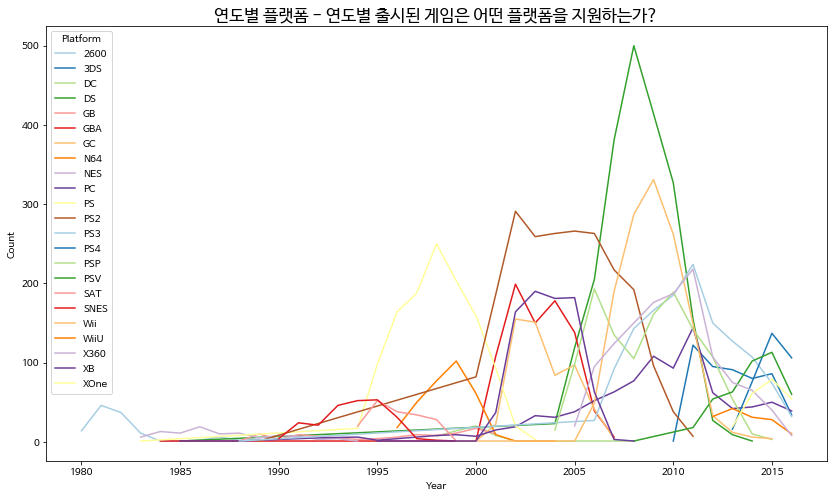

In [23]:
# 시각화
sns.color_palette("Paired")
plt.figure(figsize=(14, 8))

sns.lineplot(x="Year", y="Count", hue="Platform", data=trend_sum_pla, palette='Paired');
plt.title('연도별 플랫폼 - 연도별 출시된 게임은 어떤 플랫폼을 지원하는가?', fontsize='17')
plt.show()

In [48]:
# 1~3차 성장 시기의 트렌드와 관련없는 변수를 모두 Drop
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("GBA")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("GB")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("2600")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("3DS")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("DC")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("NES")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("PS3")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("PS4")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("PSP")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("PSV")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("SAT")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("WiiU")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("X360")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("XOne")]
trend_sum = trend_sum[~trend_sum['Platform'].str.contains("PC")]

trend_sum_pla = trend_sum.groupby(by=['Platform', 'Year'], as_index=False).count()
trend_sum_pla = trend_sum_pla[{'Platform', 'Year', 'Publisher'}]
trend_sum_pla.rename(columns = {"Publisher" : "Count"}, inplace = True)

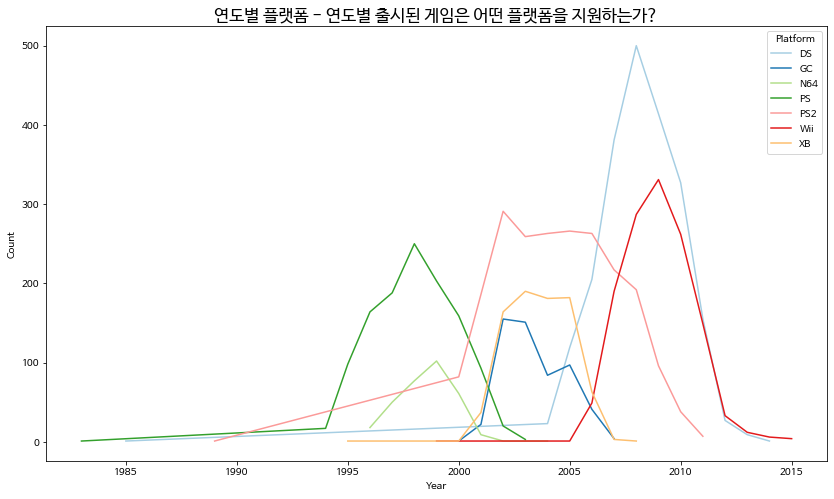

In [47]:
# 재 시각화
plt.figure(figsize=(14, 8))

sns.lineplot(x="Year", y="Count", hue="Platform", data=trend_sum_pla, palette='Paired');
plt.title('연도별 플랫폼 - 연도별 출시된 게임은 어떤 플랫폼을 지원하는가?', fontsize='17')
plt.show()

### **Insight**
각 성장 시기별 연관된 Platform

1차 성장 : PS, N64

2차 성장 : PS2, XB, GC

3차 성장 : DS, Wii

###**3. 연도별 장르 분포**

In [26]:
# 필요 데이터 가공
trend_sum_gen = trend_sum.groupby(by=['Genre', 'Year'], as_index=False).count()
trend_sum_gen = trend_sum_gen[{'Genre', 'Year', 'Publisher'}]
trend_sum_gen.rename(columns = {"Publisher" : "Count"}, inplace = True)

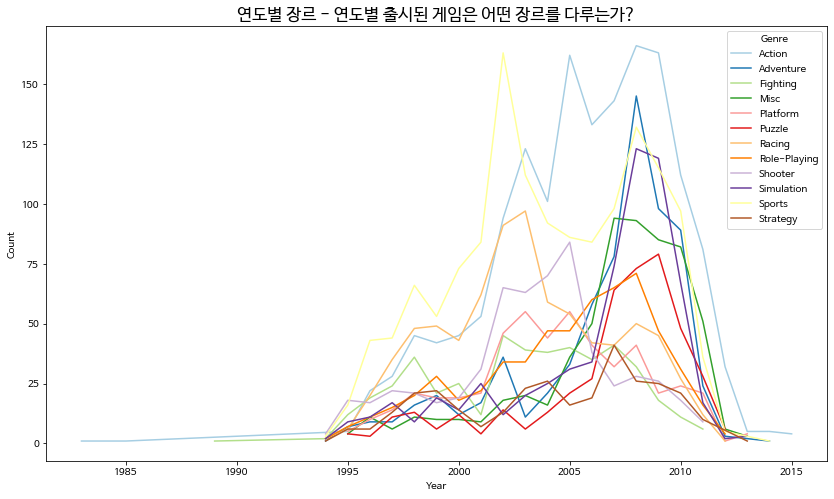

In [27]:
# 시각화
plt.figure(figsize=(14, 8))

sns.lineplot(x="Year", y="Count", hue="Genre", data=trend_sum_gen, palette='Paired');
plt.title('연도별 장르 - 연도별 출시된 게임은 어떤 장르를 다루는가?', fontsize='17')
plt.show()

In [28]:
# 1~3차 성장 시기의 트렌드와 관련없는 변수를 모두 Drop
trend_sum_gen = trend_sum_gen[~trend_sum_gen['Genre'].str.contains("Strategy")]
trend_sum_gen = trend_sum_gen[~trend_sum_gen['Genre'].str.contains("Racing")]
trend_sum_gen = trend_sum_gen[~trend_sum_gen['Genre'].str.contains("Puzzle")]
trend_sum_gen = trend_sum_gen[~trend_sum_gen['Genre'].str.contains("Platform")]
trend_sum_gen = trend_sum_gen[~trend_sum_gen['Genre'].str.contains("Misc")]
trend_sum_gen = trend_sum_gen[~trend_sum_gen['Genre'].str.contains("Fighting")]
trend_sum_gen = trend_sum_gen[~trend_sum_gen['Genre'].str.contains("Simulation")]

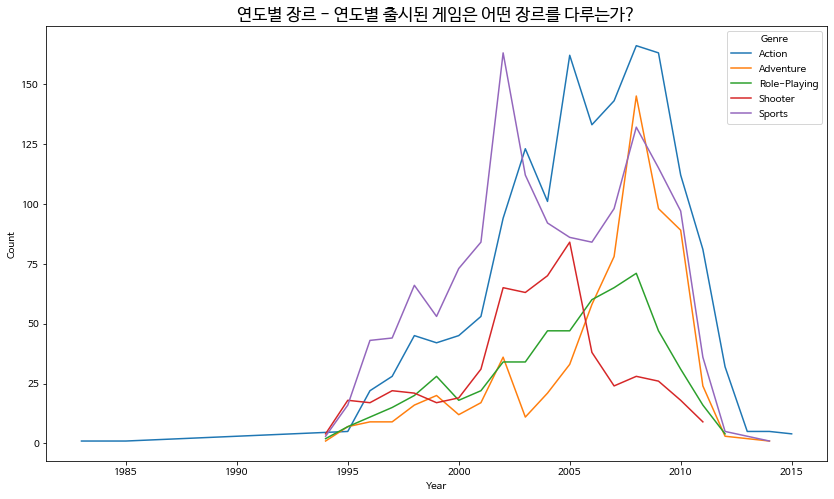

In [29]:
# 재 시각화
plt.figure(figsize=(14, 8))

sns.lineplot(x="Year", y="Count", hue="Genre", data=trend_sum_gen);
plt.title('연도별 장르 - 연도별 출시된 게임은 어떤 장르를 다루는가?', fontsize='17')
plt.show()

### **Insight**
각 성장 시기별 연관된 Genre

1차 성장 : Sports, Action

2차 성장 : Sports, Action

3차 성장 : Sports, Action, Adventure

### **Q2 종합 Insight**

- Platform 관련 흥미로운 점은, **1~3차 성장 전 후 간격으로 새로운 Platform의 출시가 있었고,**

   **해당 Platform이 게임 산업의 트렌드를 만들어가고 있었음**을 추측할 수 있음

1. **1차 성장 : 1995 ~ 2000년 / PS 출시 94년, N64 출시 96년**

2. **2차 성장 : 2000 ~ 2003년 / PS2 출시 00년, XB 출시 01년, GC 출시 01년**

3. **3차 성장 : 2005 ~ 2010년 / DS 출시 04년, Wii 06년** (출시연도 출처 : 구글 검색)

</br>

- 여기에 각 성장 시기별 연관된 Genre 분석에서 도출된 Sports, Action Genre 결과를 합하여 생각해보면,
   
  **Sports, Action Genre를 중심으로 새로운 Platform이 출시되기 전 후의 시기에 맞추어**
  
  **게임을 설계 및 출시를 진행**하는 것이 적절하다고 판단됨
  
  (혹은 이전에 타 Platform에서 성공했던 게임을 새로운 Platform 사양에 맞추어 재 출시하는 것도 방법이라고 판단됨)

</br>

- 다만 새로운 Platform의 출시가 성공적인 판매량을 보장한다는 근거가 부족하기 때문에 추가적인 조사가 필요

- 또한 일본의 경우 Role-Playing 및 Platform Genre의 선호도가 높기 때문에 일본을 타겟으로 게임을 설계할 시 추가적인 조사가 필요


# **Q3 : 높은 출고량을 기록한 게임 분석**

### **상위 206개 게임의 Platform, Genre, Publisher 분포 현황**

In [30]:
# 필요 데이터 추출 : 판매량 5이상의 206개 게임
high_game = df2.sort_values(by=['Total_Sales'], axis=0, ascending=False)
high_game = high_game.iloc[0:206,]
high_game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
14092,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4758,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
13460,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
14093,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2917,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [31]:
# 필요 데이터 가공 - Platform
high_game_pla = high_game.groupby(by=['Platform'], as_index=False).count()
high_game_pla = high_game_pla[{'Platform', 'Total_Sales'}]
high_game_pla.rename(columns = {"Total_Sales" : "Count"}, inplace = True)

In [32]:
# 필요 데이터 가공 - Genre
high_game_gen = high_game.groupby(by=['Genre'], as_index=False).count()
high_game_gen = high_game_gen[{'Genre', 'Total_Sales'}]
high_game_gen.rename(columns = {"Total_Sales" : "Count"}, inplace = True)

In [33]:
# 필요 데이터 가공 - Publisher
high_game_pub = high_game.groupby(by=['Publisher'], as_index=False).count()
high_game_pub = high_game_pub[{'Publisher', 'Total_Sales'}]
high_game_pub.rename(columns = {"Total_Sales" : "Count"}, inplace = True)

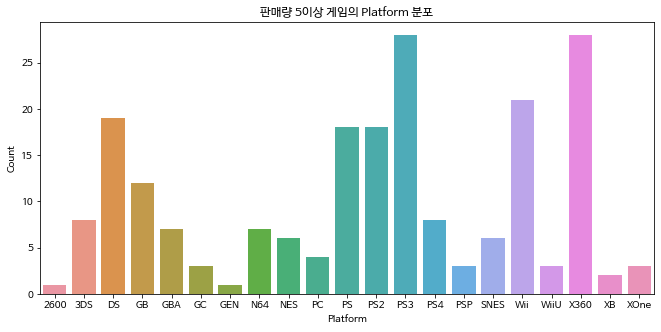

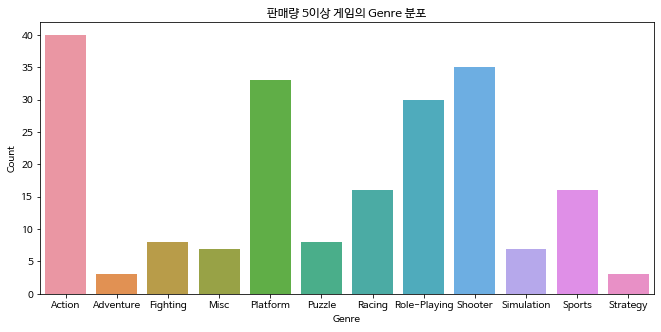

In [34]:
# 시각화 - Platform
plt.figure(figsize=(11, 5))
sns.barplot(data = high_game_pla, x= "Platform", y= "Count");
plt.title('판매량 5이상 게임의 Platform 분포', fontsize='12');

# 시각화 - Genre
plt.figure(figsize=(11, 5))
sns.barplot(data = high_game_gen, x= "Genre", y= "Count");
plt.title('판매량 5이상 게임의 Genre 분포', fontsize='12');

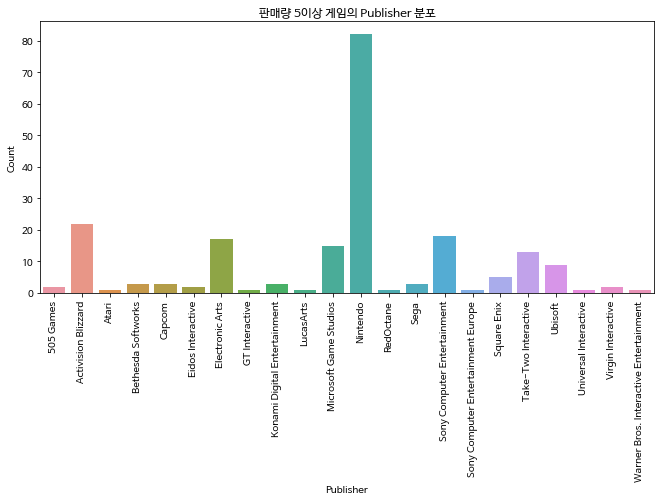

In [35]:
# 시각화 - Publisher
plt.figure(figsize=(11, 5))
sns.barplot(data = high_game_pub, x= "Publisher", y= "Count");
plt.title('판매량 5이상 게임의 Publisher 분포', fontsize='12');
plt.xticks(rotation = 90)
plt.show()

In [36]:
#Role-Playing과 Platform Genre의 Publisher 확인
test = high_game[high_game['Genre'].str.contains('Role-Playing')]
test = test[test['Publisher'].str.contains('Nintendo')]
test = test[test['Publisher'].str.contains('Sony Computer Entertainment')]

test2 = high_game[high_game['Genre'].str.contains('Platform')]
test2 = test2[test2['Publisher'].str.contains('Nintendo')]
test2 = test2[test2['Publisher'].str.contains('Sony Computer Entertainment')]

In [37]:
#Shooter 확인
test3 = high_game[high_game['Genre'].str.contains('Shooter')]

In [49]:
high_game.sort_values(by=['Name'], axis=0).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
157,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.10
749,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.28
14342,Assassin's Creed,X360,2007,Adventure,Ubisoft,3.28,1.65,0.07,0.55,5.55
14343,Assassin's Creed II,X360,2009,Action,Ubisoft,3.10,1.56,0.08,0.51,5.25
9165,Assassin's Creed II,PS3,2009,Action,Ubisoft,2.54,1.95,0.21,0.87,5.57
9166,Assassin's Creed III,PS3,2012,Action,Ubisoft,2.64,2.56,0.16,1.14,6.50
14344,Assassin's Creed III,X360,2012,Action,Ubisoft,3.13,1.71,0.03,0.44,5.31
9190,Batman: Arkham City,PS3,2011,Action,Warner Bros. Interactive Entertainment,2.70,1.91,0.11,0.80,5.52
9195,Battlefield 3,PS3,2011,Shooter,Electronic Arts,2.85,2.93,0.35,1.10,7.23
14372,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34


### **Insight**
- 이전 분석에서 유의미한 결과가 없었던 PS3와 X360가 각각 1,2위를 기록하고 있으며,

   PS(1차), PS2(2차), DS/Wii(3차)는 20회 가량을 기록하고 있음

- Q2의 2번에서 PS, PS2, DS, Wii를 제외한 나머지 Platform은 게임 발행 횟수에 비해 하위권을 기록하고 있음

- **Q2의 3번에서 언급된 대표적인 Genre인 Sports, Action, Adventure 중** **Action에서만 높은 수치를 기록하고 있으며,**
   
   **그외의 Shooter, Role-Playing, Platform의 높은 수치가 인상깊음**

- 이전의 Publisher 분포와 Q1을 결합하여 고려해보았을 때, **Role-Playing** **Platform이 높은 수치를 기록하는 이유는**

   **일본 게임회사인 Nintendo, Sony의 영향이 있을 것으로 추측 됨**
   
   (Role-Playing 30건 중 Nintendo는 14건 Sony는 3건, Platform 34건 중 Nintendo는 26건 Sony는 5건)

- 더불어 Shooter이 높은 수치를 기록하는 이유는 Activision Blizzard사의 Call of Duty 시리즈가 지속적으로 높은 출고량을 기록하기 때문으로 추측 됨

- **대체로 높은 판매량을 기록한 게임은 하나의 게임이 시리즈로 출시되거나, 여럿의** **Platform으로 변형 출시되는 경향이 있음**

### **높은 출고량의 주요 요인 - 국가별 Sales를 중심으로**

In [39]:
# 필요 데이터 추출 및 Rank화
high_game_rank = high_game[{'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}]
high_game_rank = high_game_rank.rank(method='dense', ascending=False, axis=1)

In [40]:
#국가별 출고량 순위 확인 및 데이터 저장
#high_game_rank.groupby(by=['NA_Sales'], as_index=False).count()
#high_game_rank.groupby(by=['EU_Sales'], as_index=False).count()
#high_game_rank.groupby(by=['JP_Sales'], as_index=False).count()
#high_game_rank.groupby(by=['Other_Sales'], as_index=False).count()

high_game_rank_total = pd.DataFrame({'Rank':[1, 2, 3, 4],
                             'NA_Sales':[151, 41, 14, 0],
                             'EU_Sales':[36, 125, 42, 3],
                             'JP_Sales':[17, 32, 56, 101],
                             'Other_Sales':[2, 8, 96, 100]})
high_game_rank_total

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,151,36,17,2
1,2,41,125,32,8
2,3,14,42,56,96
3,4,0,3,101,100


### **Insight**
- 상단의 각 게임의 지역별 출고량 순위 Count 데이터를 통해 상위권의 출고량을 기록한 게임은 **대체로 북아메리카 및 유럽에서 인기가 있었음**을 알 수 있음

   (이는 위에서 언급한 것 처럼 특정 지역의 문화적 특성보다는 각 지역의 인구수가 원인이 될 것으로 예상. 북아메리카 5.79억, 유럽 7.464억, 일본 1.263억)


- 이를 통해 **광범위하게 글로벌 사용자를 타겟으로 게임을 설계하기보다 북아메리카 및 유럽으로**
타겟을 좁혀 게임을 설계하는 것도 적절하다고 판단됨

# 종합

1. 게임 산업도 연도별 트렌드가 존재하고 지역별 선호 장르의 차이도 어느정도 존재함
2. 그러나 이러한 분석 결과와 상위 206개의 게임에는 결과의 차이가 존재함
3. 이러한 차이에는 다양한 이유가 있으나, 대표적으로 하나의 게임이 시리즈로 출시되거나,

 여럿의 Platform으로 변형 출시되기 때문인 요인이 가장 크다고 판단 됨
4. 북아메리카 및 유럽에서의 출고량 수치가 전체 출고량 수치에 많은 관련이 있는점을 고려할 때,

  기존에 출시된 게임 중 북아메리카와 유럽에서 반응이 있었던 게임을 다양한 Platform으로 출시하거나
  
  기존 게임의 신규 시리즈를 설계하여 출시하는 것이 유리하다고 판단됨